$$B\rightarrow K^{*}\eta,          \eta\rightarrow\gamma\gamma$$

99.93714644877436

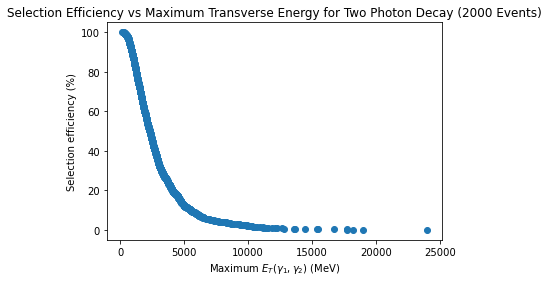

In [3]:
import uproot as ur
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

datafile = ur.open("./DVntuple4.root")
datafile_heavy = ur.open("./DVntupleHM.root")

datafile.keys()
events = datafile['MCDecayTreeTuple/MCDecayTree;1']

gamma0_PT = events['gamma0_PT']
gamma1_PT = events['gamma_PT']

gamma0_PT = gamma0_PT.array(library="np")
gamma1_PT = gamma1_PT.array(library="np")

max_horiz_axis = [] # List to store the maximum transverse energy of each photon pair
min_horiz_axis = [] # List to store the maximum transverse momentum of each photon pair

for i in range(len(gamma0_PT)):
    max_horiz_axis.append(max(gamma0_PT[i], gamma1_PT[i]))
    min_horiz_axis.append(min(gamma0_PT[i], gamma1_PT[i]))

# Will be used as horizontal axis for corresponding plots
max_horiz_axis = np.array(max_horiz_axis)
min_horiz_axis = np.array(min_horiz_axis)

#Compute signal selection efficiency

max_ver_axis = []
for i in range(len(max_horiz_axis)):
    counter = 0
    for j in range(len(gamma0_PT)):
        if ((gamma0_PT[j] > max_horiz_axis[i]) or (gamma1_PT[j] > max_horiz_axis[i])):
            counter += 1
    max_ver_axis.append(counter)
        
max_ver_axis = np.array(max_ver_axis)
max_ver_axis = max_ver_axis/15.91

plt.scatter(max_horiz_axis, max_ver_axis)
plt.xlabel('Maximum $E_{T}(\gamma_{1}, \gamma_{2})$ (MeV)')
plt.ylabel('Selection efficiency (%)')
plt.title("Selection Efficiency vs Maximum Transverse Energy for Two Photon Decay (2000 Events)")
max(max_ver_axis)

Text(0.5, 1.0, 'Selection Efficiency vs Minimum Transverse Energy for Two Photon Decay (1591 Events)')

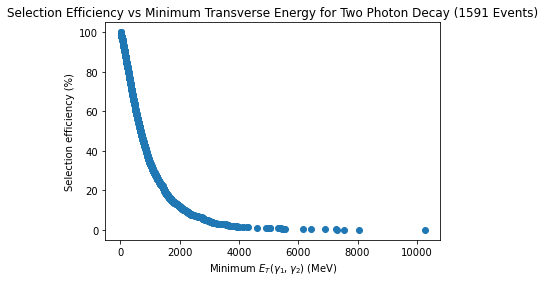

In [4]:
min_ver_axis = []
for i in min_horiz_axis:
    counter = 0
    for j in range(len(gamma0_PT)):
        if ((gamma0_PT[j] > i) and (gamma1_PT[j] > i)):
            counter += 1
    min_ver_axis.append(counter)
        
min_ver_axis = np.array(min_ver_axis)
min_ver_axis = min_ver_axis/15.91
plt.figure()
plt.scatter(min_horiz_axis, min_ver_axis)
plt.xlabel('Minimum $E_{T}(\gamma_{1}, \gamma_{2})$ (MeV)')
plt.ylabel('Selection efficiency (%)')
plt.title("Selection Efficiency vs Minimum Transverse Energy for Two Photon Decay (1591 Events)")

$$B\rightarrow K^{*}\gamma$$

[2721.27541945 2671.59606651 4240.52543089 ... 5241.91762158 6002.5292846
 6775.44608133]


Text(0.5, 1.0, 'Selection Efficiency vs Photon Transverse Energy for Single Photon Mode')

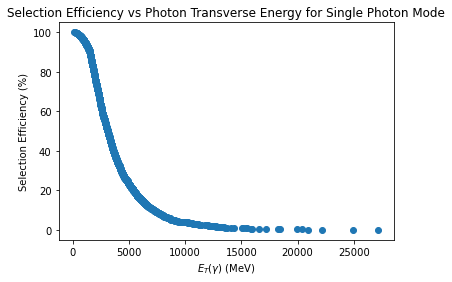

In [5]:
datafile2 = ur.open("./DVntuple2.root")
datafile2.keys()
events = datafile2['MCDecayTreeTuple/MCDecayTree;1']
gamma_PT = events['gamma_PT']
gamma_PT = gamma_PT.array(library="np")

ver_axis = []

print(gamma_PT)
for val in range(len(gamma_PT)):
    counter = 0
    for j in range(len(gamma_PT)):
        if gamma_PT[val] < gamma_PT[j]:
            counter += 1
    ver_axis.append(counter)

ver_axis = np.array(ver_axis)/16
plt.scatter(gamma_PT, ver_axis)
plt.xlabel("$E_{T}(\gamma)$ (MeV)")
plt.ylabel("Selection Efficiency (%)")
plt.title("Selection Efficiency vs Photon Transverse Energy for Single Photon Mode")

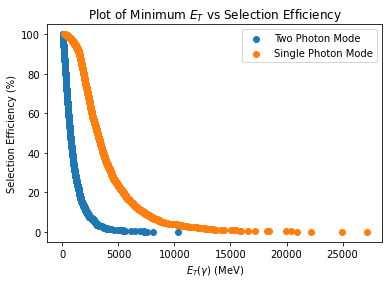

In [6]:
plt.figure()
plt.scatter(min_horiz_axis, min_ver_axis)
plt.scatter(gamma_PT, ver_axis)
plt.xlabel('$E_{T}(\gamma)$ (MeV)')
plt.ylabel('Selection Efficiency (%)')
plt.title("Plot of Minimum $E_{T}$ vs Selection Efficiency")
plt.legend(['Two Photon Mode', 'Single Photon Mode'])

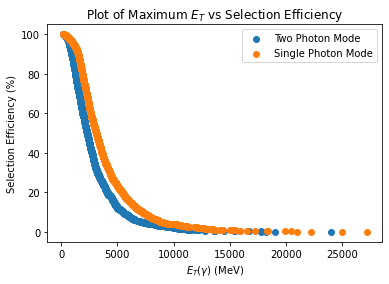

In [7]:
plt.figure()
plt.scatter(max_horiz_axis, max_ver_axis)
plt.scatter(gamma_PT, ver_axis)
plt.xlabel('$E_{T}(\gamma)$ (MeV)')
plt.ylabel('Selection Efficiency (%)')
plt.title("Plot of Maximum $E_{T}$ vs Selection Efficiency")
plt.legend(['Two Photon Mode', 'Single Photon Mode'])

(0.0, 5000.0)

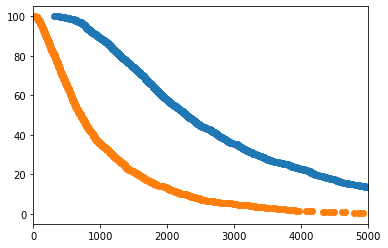

In [8]:
#Heavy mass plot code
datafile_heavy.keys()
heavy_events = datafile_heavy['MCDecayTreeTuple/MCDecayTree;1']
heavy_gamma0_PT = heavy_events['gamma0_PT']
heavy_gamma_PT = heavy_events['gamma_PT']

heavy_gamma0_PT = heavy_gamma0_PT.array(library="np")
heavy_gamma_PT = heavy_gamma_PT.array(library="np")
heavy_max_horiz_axis = [] # List to store the maximum transverse energy of each photon pair
heavy_min_horiz_axis = [] # List to store the maximum transverse momentum of each photon pair

for i in range(len(heavy_gamma0_PT)):
    heavy_max_horiz_axis.append(max(heavy_gamma0_PT[i], heavy_gamma_PT[i]))
    heavy_min_horiz_axis.append(min(heavy_gamma0_PT[i], heavy_gamma_PT[i]))

# Will be used as horizontal axis for corresponding plots
heavy_max_horiz_axis = np.array(heavy_max_horiz_axis)
heavy_min_horiz_axis = np.array(heavy_min_horiz_axis)

#Compute signal selection efficiency

heavy_max_ver_axis = []
for i in range(len(heavy_max_horiz_axis)):
    counter = 0
    for j in range(len(heavy_gamma0_PT)):
        if ((heavy_gamma0_PT[j] > heavy_max_horiz_axis[i]) or (heavy_gamma_PT[j] > heavy_max_horiz_axis[i])):
            counter += 1
    heavy_max_ver_axis.append(counter)
        
heavy_max_ver_axis = np.array(heavy_max_ver_axis)
heavy_max_ver_axis = heavy_max_ver_axis/16.29
heavy_min_ver_axis = []
for i in heavy_min_horiz_axis:
    counter = 0
    for j in range(len(heavy_gamma0_PT)):
        if ((heavy_gamma0_PT[j] > i) and (heavy_gamma_PT[j] > i)):
            counter += 1
    heavy_min_ver_axis.append(counter)
        
heavy_min_ver_axis = np.array(heavy_min_ver_axis)
heavy_min_ver_axis = heavy_min_ver_axis/16.29
plt.figure()
plt.scatter(heavy_max_horiz_axis, heavy_max_ver_axis)
plt.scatter(heavy_min_horiz_axis, heavy_min_ver_axis)
plt.xlim(0,5000)

57.625
70.52374709145282


7.615523535522158e-05

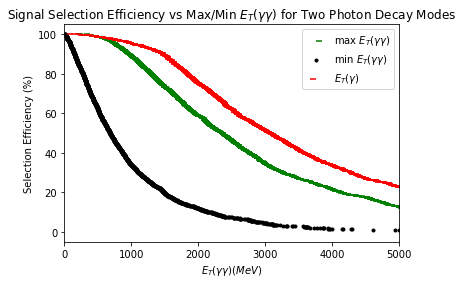

In [9]:
plt.figure()
plt.scatter(max_horiz_axis,max_ver_axis, marker=1, color = 'green')
plt.scatter(min_horiz_axis, min_ver_axis, color = 'black', marker = ".")
plt.scatter(gamma_PT, ver_axis, color = 'red', marker=0)
plt.xlabel("$E_{T}(\gamma\gamma) (MeV)$")
plt.ylabel("Selection Efficiency (%)")
plt.legend(['max $E_{T}(\gamma\gamma)$', 'min $E_{T}(\gamma\gamma)$', '$E_{T}(\gamma)$'])
plt.xlim(0,5000)
plt.title("Signal Selection Efficiency vs Max/Min $E_{T}(\gamma\gamma)$ for Two Photon Decay Modes")

eff_gamma = np.interp(2600, gamma_PT, ver_axis)
eff_gamma_gamma = np.interp(2600, max_horiz_axis, max_ver_axis)
print(eff_gamma)
print(eff_gamma_gamma)
((eff_gamma_gamma/eff_gamma)*(0.2479/0.1725)*(4.33e-5))


In [10]:
np.interp(2600, max_horiz_axis, max_ver_axis)

70.52374709145282

Text(0.5, 1.0, 'Plot of Energy Difference Between Two Photons vs Transverse Momentum of $B^{0}$')

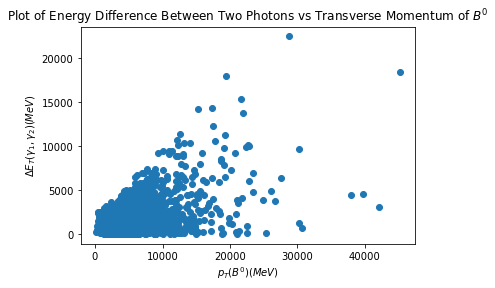

In [11]:
events = datafile['MCDecayTreeTuple/MCDecayTree;1']
B0_pt = events["B0_PT"]
B0_pt = B0_pt.array(library="np")
energy_diff = np.abs(gamma0_PT - gamma1_PT)
plt.figure()
plt.scatter(B0_pt, energy_diff)
plt.xlabel("$p_{T}(B^{0}) (MeV)$")
plt.ylabel("$\Delta E_{T}(\gamma_{1}, \gamma_{2})(MeV)$")
plt.title("Plot of Energy Difference Between Two Photons vs Transverse Momentum of $B^{0}$")

Text(0.5, 1.0, 'Histogram of Difference in $E_{T}$ of $\\gamma_{1}$ and $\\gamma_{2}$')

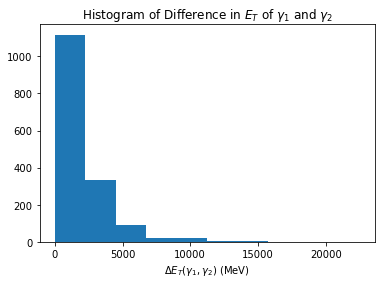

In [12]:
plt.hist(energy_diff)
plt.xlabel("$\Delta E_{T}(\gamma_{1}, \gamma_{2})$ (MeV)")
plt.title("Histogram of Difference in $E_{T}$ of $\gamma_{1}$ and $\gamma_{2}$")

In [13]:
def trig_eff_plot_gamma_gamma(filename):
    datafile = ur.open(filename)
    events = datafile['MCDecayTreeTuple/MCDecayTree;1']
    gamma0_PT = events['gamma0_PT']
    gamma1_PT = events['gamma_PT']

    gamma0_PT = gamma0_PT.array(library="np")
    gamma1_PT = gamma1_PT.array(library="np")

    max_horiz_axis = [] # List to store the maximum transverse energy of each photon pair
    min_horiz_axis = [] # List to store the maximum transverse momentum of each photon pair

    for i in range(len(gamma0_PT)):
        max_horiz_axis.append(max(gamma0_PT[i], gamma1_PT[i]))
        min_horiz_axis.append(min(gamma0_PT[i], gamma1_PT[i]))

# Will be used as horizontal axis for corresponding plots
    max_horiz_axis = np.array(max_horiz_axis)
    min_horiz_axis = np.array(min_horiz_axis)

#Compute signal selection efficiency

    max_ver_axis = []
    for i in range(len(max_horiz_axis)):
        counter = 0
        for j in range(len(gamma0_PT)):
            if ((gamma0_PT[j] > max_horiz_axis[i]) or (gamma1_PT[j] > max_horiz_axis[i])):
                counter += 1
        max_ver_axis.append(counter)
        
    max_ver_axis = np.array(max_ver_axis)
    max_ver_axis = max_ver_axis/(len(max_horiz_axis)*0.01)
    min_ver_axis = []
    for i in min_horiz_axis:
        counter = 0
        for j in range(len(gamma0_PT)):
            if ((gamma0_PT[j] > i) and (gamma1_PT[j] > i)):
                counter += 1
        min_ver_axis.append(counter)
    min_ver_axis = np.array(min_ver_axis)/(len(min_horiz_axis)*0.01)
    
    return [max_horiz_axis, max_ver_axis, min_horiz_axis, min_ver_axis]



    

Text(0.5, 1.0, 'Plot of Signal Selection Efficiency vs Photon Transverse Energy for Varying ALP Masses')

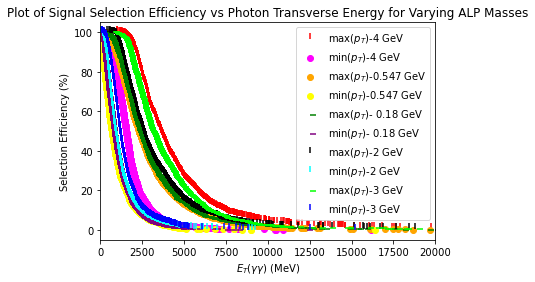

In [14]:
plt.figure()
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple4GeV.root')[0], trig_eff_plot_gamma_gamma('./DVntuple4GeV.root')[1], color = 'red', marker = 2)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple4GeV.root')[2], trig_eff_plot_gamma_gamma('./DVntuple4GeV.root')[3], color = 'magenta')
plt.scatter(trig_eff_plot_gamma_gamma('./DVntupleEta.root')[0], trig_eff_plot_gamma_gamma('./DVntupleEta.root')[1], color = 'orange')
plt.scatter(trig_eff_plot_gamma_gamma('./DVntupleEta.root')[2], trig_eff_plot_gamma_gamma('./DVntupleEta.root')[3], color = 'yellow')
plt.scatter(trig_eff_plot_gamma_gamma('./DVntupleLM.root')[0], trig_eff_plot_gamma_gamma('./DVntupleLM.root')[1], color = 'green', marker = 1)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntupleLM.root')[2], trig_eff_plot_gamma_gamma('./DVntupleLM.root')[3], color = 'purple', marker = 1)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple2GeV.root')[0], trig_eff_plot_gamma_gamma('./DVntuple2GeV.root')[1],color = 'black', marker = 2)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple2GeV.root')[2], trig_eff_plot_gamma_gamma('./DVntuple2GeV.root')[3], color = 'cyan', marker = 2)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple3GeV.root')[0], trig_eff_plot_gamma_gamma('./DVntuple3GeV.root')[1], color = 'lime', marker = 1)
plt.scatter(trig_eff_plot_gamma_gamma('./DVntuple3GeV.root')[2], trig_eff_plot_gamma_gamma('./DVntuple3GeV.root')[3], color = 'blue', marker = 2)

plt.legend(['max($p_{T}$)-4 GeV', 'min($p_{T}$)-4 GeV', 'max($p_{T}$)-0.547 GeV', 'min($p_{T}$)-0.547 GeV', 'max($p_{T}$)- 0.18 GeV', 'min($p_{T}$)- 0.18 GeV', 'max($p_{T}$)-2 GeV', 'min($p_{T}$)-2 GeV', 'max($p_{T}$)-3 GeV', 'min($p_{T}$)-3 GeV'], loc = 'best')
plt.xlim(0,20000)
plt.ylabel("Selection Efficiency (%)")
plt.xlabel("$E_{T}(\gamma\gamma)$ (MeV)")
plt.title('Plot of Signal Selection Efficiency vs Photon Transverse Energy for Varying ALP Masses')

In [15]:
#Plot of fraction of photons above 2.5 GeV
def threshold_frac_plot(filename):
    datafile = ur.open(filename)
    events = datafile['MCDecayTreeTuple/MCDecayTree;1']
    gamma0_PT = events['gamma0_PT']
    gamma1_PT = events['gamma_PT']
    
    gamma0_PT = gamma0_PT.array(library="np")
    gamma1_PT = gamma1_PT.array(library="np")
    num_of_evts = []
    for i in range(len(gamma0_PT)):
        counter = 0
        for j in range(len(gamma1_PT)):
            if ((gamma0_PT[j] > 2500) or (gamma1_PT[j] > 2500)):
                counter += 1
        num_of_evts.append(counter)
    num_of_evts = np.array(num_of_evts)
    ver_axis_proportion = counter/len(gamma0_PT)
    return ver_axis_proportion
    

Text(0.5, 1.0, 'Proportion of Photons with $p_T(\\gamma\\gamma) > 2.5$ GeV as a Function of ALP Mass')

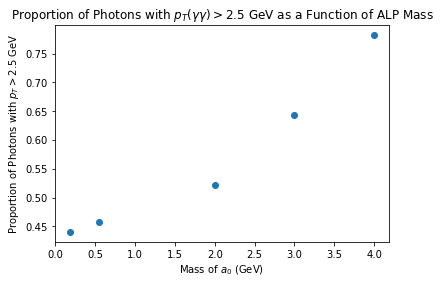

In [16]:
a0_mass = [0.18, 0.547, 2,3, 4]
ver_axis = [threshold_frac_plot('./DVntupleLM.root'), threshold_frac_plot('./DVntupleEta.root'), threshold_frac_plot('./DVntuple2GeV.root'),threshold_frac_plot('./DVntuple3GeV.root'),threshold_frac_plot('./DVntuple4GeV.root')]
a0_mass = np.array(a0_mass)
ver_axis = np.array(ver_axis)
plt.scatter(a0_mass, ver_axis)
plt.xlabel('Mass of $a_{0}$ (GeV)')
plt.ylabel('Proportion of Photons with $p_T > 2.5$ GeV')
plt.title("Proportion of Photons with $p_T(\gamma\gamma) > 2.5$ GeV as a Function of ALP Mass")

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
#Branching Ratio vs g_aW Coupling expressions
M_B = 5
M_W = 80
M_c = 1.27
M_t = 173
G_F = 1.166e-5

T_B = 2485584218512.8984
V_cb = 0.041
V_cs_star = 0.973
V_tb = 0.999
V_ts_star = 0.040


M_a = np.arange(0.01, 5, 0.1)
A_0 = M_a**2
M_K_star =  0.895

lambda_mass_term = (1-((M_a+M_K_star)**2/M_B**2)*(1-(M_a-M_K_star)**2)/M_B**2)

def f(x):
    retval = (x*(1+x*(math.log(x)-1)))/((1-x))**2
    return retval

denom_term = (V_cb*V_cs_star*f(M_c**2/M_W**2)+V_tb*V_ts_star*f(M_t**2/M_W**2))**2*M_a**2*T_B


In [19]:
def gaW_mass_curve(branching_ratio):
    return (((branching_ratio)/(M_B**3)*((256*math.pi**4)/(18*G_F**2*M_W**4))*((lambda_mass_term)**-1.5)/denom_term))**0.5

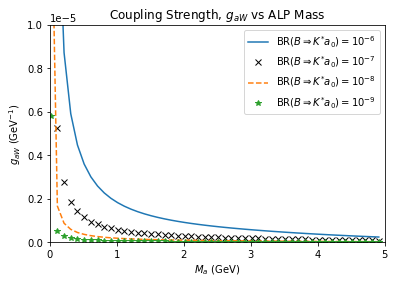

In [27]:
plt.figure()
plt.plot(M_a, gaW_mass_curve(10e-6))
plt.plot(M_a, gaW_mass_curve(10e-7), 'x', color = 'black')
plt.plot(M_a, gaW_mass_curve(10e-8), '--')
plt.plot(M_a, gaW_mass_curve(10e-9), '*')
plt.xlabel("$M_{a}$ (GeV)")
plt.ylabel("$g_{aW}$ (GeV$^{-1}$)")
plt.title('Coupling Strength, $g_{aW}$ vs ALP Mass')
plt.xlim(0,5)
plt.ylim(0,10e-6)
plt.legend(['BR($B\Rightarrow K^{*}a_{0}) = 10^{-6}$','BR($B\Rightarrow K^{*}a_{0}) = 10^{-7}$', 'BR($B\Rightarrow K^{*}a_{0}) = 10^{-8}$','BR($B\Rightarrow K^{*}a_{0}) = 10^{-9}$' ])

In [ ]:
492/2475

In [ ]:
import math
492/math.sqrt((2475+492))

In [ ]:
2475*25

In [ ]:
def quadratic_formula(a, b, c):
    solution = ((-b+math.sqrt(b**2-4*a*c))/(2*a), (-b-math.sqrt(b**2-4*a*c))/(2*a))
    return solution

In [ ]:
quadratic_formula(1,-(1.64)**4,-(2475*1.64**2))

In [ ]:
85/(547*9)